In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath,amsfonts,amssymb}"
})

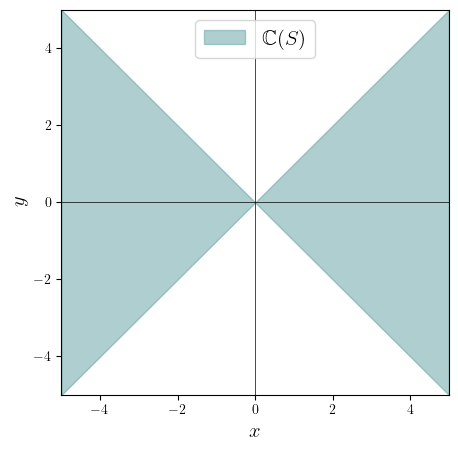

In [ ]:
x_range = np.linspace(-5, 5, 500)

# Linie definiujące granice obszaru
y_upper = np.abs(x_range)  # y = |x|
y_lower = -np.abs(x_range) # y = -|x|

# Rysowanie wykresu
plt.figure(figsize=(5, 5))

# Wypełnienie obszaru |x| < |y|
plt.fill_between(x_range, y_lower, y_upper, color='cadetblue', alpha=0.5, label=r"$\mathbb{C}(S)$")

# Dostosowanie wykresu
plt.axhline(0, color='black', linewidth=0.5)  # oś pozioma
plt.axvline(0, color='black', linewidth=0.5)  # oś pionowa
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)
# Legenda
plt.legend(fontsize=15, loc='upper center')

os.makedirs("zdjecia_symulacji", exist_ok=True)
plt.savefig("zdjecia_symulacji/zbior_C_S_R2_1.svg", format="svg", bbox_inches='tight', pad_inches=0)

plt.show()

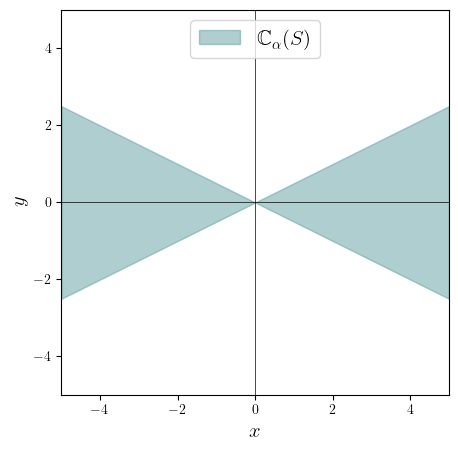

In [ ]:
x_range = np.linspace(-5, 5, 500)
alpha=0.5
# Linie definiujące granice obszaru
y_upper = np.abs(x_range)*alpha  # y = |x|
y_lower = -np.abs(x_range)*alpha # y = -|x|

# Rysowanie wykresu
plt.figure(figsize=(5, 5))

# Wypełnienie obszaru |x| < |y|
plt.fill_between(x_range, y_lower, y_upper, color='cadetblue', alpha=0.5, label=r"$\mathbb{C}_{\alpha}(S)$")

# Dostosowanie wykresu
plt.axhline(0, color='black', linewidth=0.5)  # oś pozioma
plt.axvline(0, color='black', linewidth=0.5)  # oś pionowa
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)
# Legenda
plt.legend(fontsize=15, loc='upper center')

plt.savefig("zdjecia_symulacji/zbior_C_S_R2_alpha.svg", format="svg", bbox_inches='tight', pad_inches=0)

plt.show()

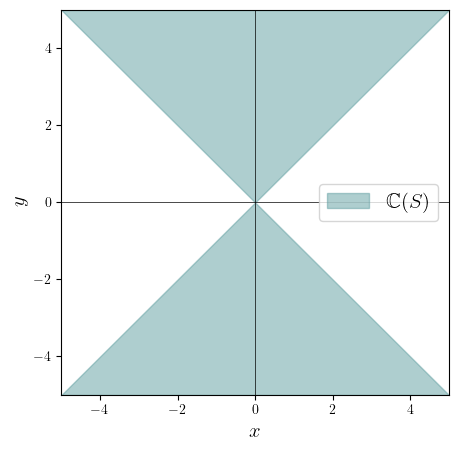

In [38]:
x_range = np.linspace(-5, 5, 500)

# Linie definiujące granice obszaru
y_upper = np.abs(x_range)  # y = |x|
y_lower = -np.abs(x_range) # y = -|x|

# Rysowanie wykresu
plt.figure(figsize=(5, 5))

# Wypełnienie obszaru |x| > |y|
plt.fill_between(x_range, y_upper, 5, color='cadetblue', alpha=0.5, label=r"$\mathbb{C}(S)$")
plt.fill_between(x_range, -5, y_lower, color='cadetblue', alpha=0.5)

# Dostosowanie wykresu
plt.axhline(0, color='black', linewidth=0.5)  # oś pozioma
plt.axvline(0, color='black', linewidth=0.5)  # oś pionowa
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)

# Legenda
plt.legend(fontsize=15, loc='center right')

os.makedirs("zdjecia_symulacji", exist_ok=True)

# Zapisanie wykresu jako pliku SVG w folderze "zdjecia_symulacji"
plt.savefig("zdjecia_symulacji/zbior_C_S_R2_2.svg", format="svg", bbox_inches='tight', pad_inches=0)
# Wyświetlenie wykresu
plt.show()

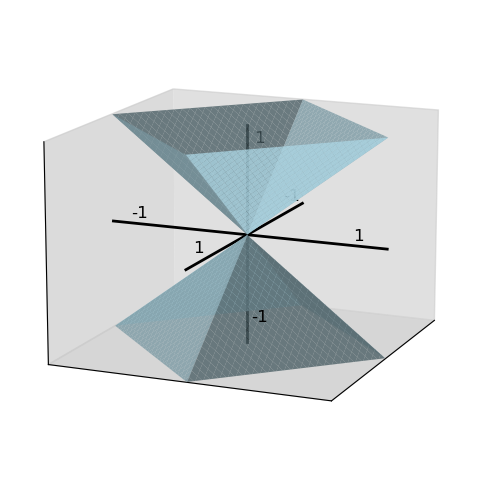

In [149]:
def generate_3d_cone(resolution=100):
    """
    Generuje dane dla stożka spełniającego nierówność |x| + |y| <= |z| w przestrzeni 3D.
    """
    # Zakresy dla x i y
    x = np.linspace(-1, 1, resolution)
    y = np.linspace(-1, 1, resolution)
    x, y = np.meshgrid(x, y)

    # Obliczanie wartości z dla górnej części stożka (z > 0)
    z_positive = np.abs(x) + np.abs(y)  # |z| = |x| + |y|, gdy z > 0

    # Obliczanie wartości z dla dolnej części stożka (z < 0)
    z_negative = -z_positive

    # Ograniczenie do stożka: tylko punkty, które spełniają nierówność |x| + |y| <= |z|
    mask = np.abs(x) + np.abs(y) <= 1  # Warunek, że |x| + |y| <= 1
    z_positive[~mask] = np.nan  # Ustawienie NaN dla punktów poza stożkiem
    z_negative[~mask] = np.nan

    return x, y, z_positive, z_negative

# Generowanie danych
resolution = 500
x, y, z_positive, z_negative = generate_3d_cone(resolution)

# Tworzenie wykresu 3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Rysowanie powierzchni dodatniej i ujemnej stożka
ax.plot_surface(x, y, z_positive, color='lightblue', alpha=0.8, edgecolor='none')  # Górna część stożka
ax.plot_surface(x, y, z_negative, color='lightblue', alpha=0.8, edgecolor='none')  # Dolna część stożka


# Rysowanie osi
ax.plot([0, 0], [-1, 1], [0, 0], color='black', linewidth=2)  # Oś Y
ax.plot([0, 0], [0, 0], [-1, 1], color='black', linewidth=2)  # Oś Z
ax.plot([-1, 1], [0, 0], [0, 0], color='black', linewidth=2)  # Oś X

# Dodawanie etykiet 1 i -1 na osiach
ax.text(0.8, 0, 0.08, '1', color='black', fontsize=12, ha='center')  # X-axis positive
ax.text(-0.8, 0, 0.08, '-1', color='black', fontsize=12, ha='center')  # X-axis negative
ax.text(0, 0.8, 0.05, '1', color='black', fontsize=12, ha='center')  # Y-axis positive
ax.text(0, -0.8, 0.05, '-1', color='black', fontsize=12, ha='center')  # Y-axis negative
ax.text(0, 0.09, 0.85, '1', color='black', fontsize=12, ha='center')  # Z-axis positive
ax.text(0, 0.09, -0.8, '-1', color='black', fontsize=12, ha='center')  # Z-axis negative

ax.xaxis.set_pane_color((0.8, 0.8, 0.8, 0.6))  # Dark gray pane for X
ax.yaxis.set_pane_color((0.8, 0.8, 0.8, 0.7))  # Dark gray pane for Y
ax.zaxis.set_pane_color((0.8, 0.8, 0.8, 0.8))  # Dark gray pane for Z# Kolor ciemnoszary boxu

# Ustawienia osi
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.view_init(elev=14, azim=23)  # Ustawienie widoku

# Zapisanie wykresu jako plik SVG
os.makedirs("zdjecia_symulacji", exist_ok=True)
plt.savefig("zdjecia_symulacji/zbior_C_S_R3_1.svg", format="svg", bbox_inches='tight', pad_inches=0)

# Wyświetlenie wykresu
plt.show()

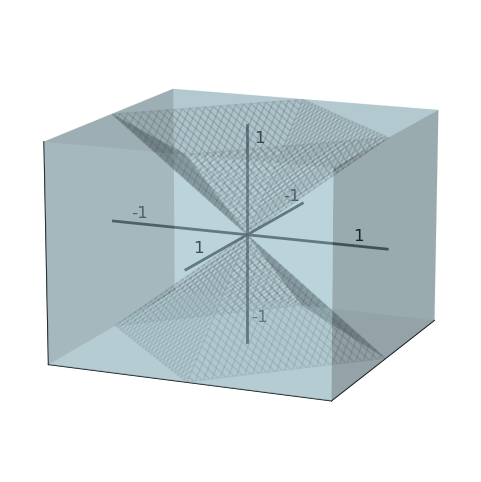

In [150]:
def generate_3d_cone(resolution=100):
    """
    Generuje dane dla stożka spełniającego nierówność |x| + |y| <= |z| w przestrzeni 3D.
    """
    # Zakresy dla x i y
    x = np.linspace(-1, 1, resolution)
    y = np.linspace(-1, 1, resolution)
    x, y = np.meshgrid(x, y)

    # Obliczanie wartości z dla górnej części stożka (z > 0)
    z_positive = np.abs(x) + np.abs(y)  # |z| = |x| + |y|, gdy z > 0

    # Obliczanie wartości z dla dolnej części stożka (z < 0)
    z_negative = -z_positive

    # Ograniczenie do stożka: tylko punkty, które spełniają nierówność |x| + |y| <= |z|
    mask = np.abs(x) + np.abs(y) <= 1  # Warunek, że |x| + |y| <= 1
    z_positive[~mask] = np.nan  # Ustawienie NaN dla punktów poza stożkiem
    z_negative[~mask] = np.nan

    return x, y, z_positive, z_negative

# Generowanie danych
resolution = 500
x, y, z_positive, z_negative = generate_3d_cone(resolution)

# Tworzenie wykresu 3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Rysowanie powierzchni dodatniej i ujemnej stożka
ax.plot_surface(x, y, z_positive, color='white', alpha=0.1, edgecolor='black')  # Górna część stożka
ax.plot_surface(x, y, z_negative, color='white', alpha=0.1, edgecolor='black')  # Dolna część stożka

# Dodawanie przezroczystego sześcianu
cube_size = 1
x_cube = np.array([-cube_size, cube_size])
y_cube = np.array([-cube_size, cube_size])
z_cube = np.array([-cube_size, cube_size])

# Tworzenie siatek dla ścian sześcianu
x_face, y_face = np.meshgrid(x_cube, y_cube)
ax.plot_surface(x_face, y_face, np.full_like(x_face, cube_size), color='lightblue', alpha=0.4)  # Górna ściana
ax.plot_surface(x_face, y_face, np.full_like(x_face, -cube_size), color='lightblue', alpha=0.4)  # Dolna ściana
z_face, x_face = np.meshgrid(z_cube, x_cube)
ax.plot_surface(x_face, np.full_like(x_face, cube_size), z_face, color='lightblue', alpha=0.4)  # Prawa ściana
ax.plot_surface(x_face, np.full_like(x_face, -cube_size), z_face, color='lightblue', alpha=0.4)  # Lewa ściana
z_face, y_face = np.meshgrid(z_cube, y_cube)
ax.plot_surface(np.full_like(y_face, cube_size), y_face, z_face, color='lightblue', alpha=0.4)  # Przednia ściana
ax.plot_surface(np.full_like(y_face, -cube_size), y_face, z_face, color='lightblue', alpha=0.4)  # Tylna ściana

# Rysowanie osi
ax.plot([0, 0], [-1, 1], [0, 0], color='black', linewidth=2)  # Oś Y
ax.plot([0, 0], [0, 0], [-1, 1], color='black', linewidth=2)  # Oś Z
ax.plot([-1, 1], [0, 0], [0, 0], color='black', linewidth=2)  # Oś X

# Dodawanie etykiet 1 i -1 na osiach
ax.text(0.8, 0, 0.08, '1', color='black', fontsize=12, ha='center')  # X-axis positive
ax.text(-0.8, 0, 0.08, '-1', color='black', fontsize=12, ha='center')  # X-axis negative
ax.text(0, 0.8, 0.05, '1', color='black', fontsize=12, ha='center')  # Y-axis positive
ax.text(0, -0.8, 0.05, '-1', color='black', fontsize=12, ha='center')  # Y-axis negative
ax.text(0, 0.09, 0.85, '1', color='black', fontsize=12, ha='center')  # Z-axis positive
ax.text(0, 0.09, -0.8, '-1', color='black', fontsize=12, ha='center')  # Z-axis negative

# Ustawienia osi
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.view_init(elev=14, azim=23)  # Ustawienie widoku

# Zapisanie wykresu jako plik SVG
os.makedirs("zdjecia_symulacji", exist_ok=True)
plt.savefig("zdjecia_symulacji/zbior_C_S_R3_2.svg", format="svg", bbox_inches='tight', pad_inches=0)

# Wyświetlenie wykresu
plt.show()